Spider
BIRD
Spider 2.0-lite


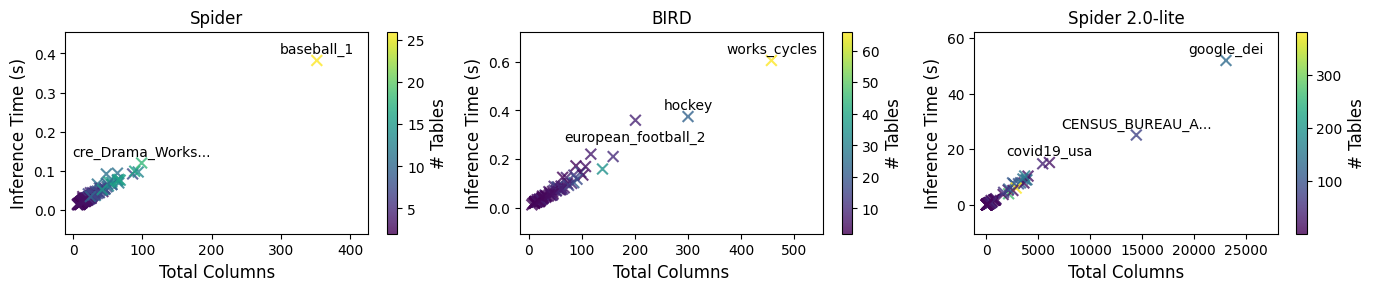

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import os

def draw_chart(log_file, ax=None, annotate_top=3, title=None, save_path=None):
    created_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))
        created_fig = True
    else:
        fig = ax.figure

    raw_table = open(log_file).read()
    rows = []
    for line in raw_table.strip().splitlines():
        parts = line.split('\t')
        if len(parts) < 4:
            continue
        db, tables, columns, time = parts[:4]
        try:
            rows.append({
                "db": db,
                "tables": int(tables),
                "columns": float(columns),
                "time": float(time)
            })
        except Exception:
            continue
    df = pd.DataFrame(rows)

    sc = ax.scatter(
        df["columns"], df["time"],
        c=df["tables"], cmap="viridis",
        s=60, alpha=0.8, marker='x'
    )

    cbar = fig.colorbar(sc, ax=ax)
    cbar.set_label("# Tables", fontsize=12)
    # shrink colorbar height to 80%
    cbox = cbar.ax.get_position()
    cbar.ax.set_position((cbox.x0, cbox.y0, cbox.width, cbox.height*0.75))

    ax.set_xlabel("Total Columns", fontsize=12)
    ax.set_ylabel("Inference Time (s)", fontsize=12)

    # choose number of annotations: 2 for Spider/Bird, else annotate_top
    print(title)
    n_points = 2 if (title in ["Spider"]) else annotate_top
    if n_points and n_points > 0 and not df.empty:
        for _, row in df.nlargest(int(n_points), "columns").iterrows():
            db = row["db"]
            if db == "european_football_2":
                ax.annotate(db,
                            (float(row["columns"]), 
                            float(row["time"])),
                            textcoords="offset points",
                            xytext=(0, -15),
                            ha='center', 
                            fontsize=10)
            else:
                if len(db) > 15:
                    db = db[:15] + "..."
                ax.annotate(db,
                            (float(row["columns"]), 
                            float(row["time"])),
                            textcoords="offset points",
                            xytext=(0, 5),
                            ha='center', 
                            fontsize=10)
            
            
            

    if title:
        ax.set_title(title, fontsize=12)

    if created_fig and not fig.get_constrained_layout():
        fig.tight_layout()

    if save_path:
        fig.savefig(save_path, bbox_inches="tight")

    return fig, ax

# Compose a 1x3 horizontal figure using the reusable draw_chart()


files = [
    ("preformance_spider_0.6B.txt", "Spider", "figures/time_spider.png"),
    ("performance_bird_0.6B.txt", "BIRD", "figures/time_bird.png"),
    ("performance_spider2_0.6B.txt", "Spider 2.0-lite", "figures/time_spider2.png"),
]

fig, axes = plt.subplots(1, 3, figsize=(14, 3.5))
# add horizontal spacing between subplots to avoid label/colorbar overlap
plt.subplots_adjust(left=0.06, right=0.98, wspace=0.2)

for ax, (log_file, title, _) in zip(axes, files):
    if os.path.exists(log_file):
        draw_chart(log_file, ax=ax, annotate_top=3, title=title)
    else:
        ax.set_visible(False)
    ax.margins(y=0.2)
    xmin, xmax = ax.get_xlim()
    span = xmax - xmin
    ax.set_xlim(xmin, xmax + 0.15*span)  # 20% extra space on the right

# shrink axis heights to 80%
for ax in axes:
    if ax.get_visible():
        box = ax.get_position()
        ax.set_position((box.x0, box.y0, box.width, box.height*0.75))

plt.savefig("figures/time_all.png", bbox_inches="tight")
plt.show()


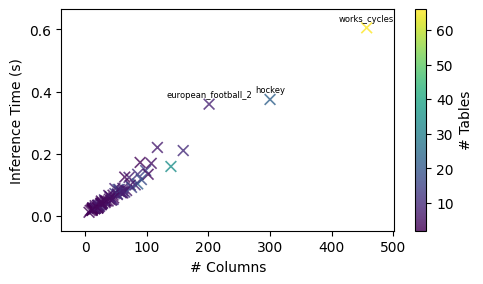

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# --- Raw table copied from the user's message (triple‑quoted for easy parsing) ---
raw_table = open('performance_bird_0.6B.txt').read()

# Parse into a DataFrame
rows = []
for line in raw_table.strip().splitlines():
    parts = line.split('\t')
    db, tables, columns, time = parts[:4]
    rows.append({
        "db": db,
        "tables": int(tables),
        "columns": int(columns),
        "time": float(time)
    })
df = pd.DataFrame(rows)

# -----------------------------------------------------------
# 1. Scatter plot: #columns vs inference time
fig, ax = plt.subplots(figsize=(5, 3.5))     # same canvas size

sc = ax.scatter(
    df["columns"], df["time"],
    c=df["tables"], cmap="viridis",
    s=60, alpha=0.8, marker='x', linewidths=1.2
)

# log-scale x-axis
# ax.set_xscale("log")
ax.set_xlabel("# Columns")
ax.set_ylabel("Inference Time (s)")
cbar = plt.colorbar(sc, label="# Tables")


# ── add padding inside the axes so nothing touches the frame ─────────
ax.margins(x=0.1, y=0.1)           # 5 % left/right, 15 % top/bottom
# annotate three widest schemas
for row in df.nlargest(3, "columns").itertuples():
    ax.annotate(row.db,
                (row.columns, row.time),
                textcoords="offset points", xytext=(0, 5),
                ha='center', fontsize=6)

plt.tight_layout()                   # keeps labels clear of figure edge

box = ax.get_position()
ax.set_position((box.x0, box.y0, box.width, box.height*0.8))
cbox = cbar.ax.get_position()
cbar.ax.set_position((cbox.x0, cbox.y0, cbox.width, cbox.height*0.8))

plt.savefig("figures/time_bird.png")
plt.show()


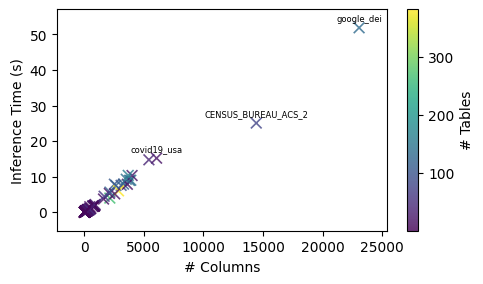

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# --- Raw table copied from the user's message (triple‑quoted for easy parsing) ---
raw_table = open('performance_spider2_0.6B.txt').read()

# Parse into a DataFrame
rows = []
for line in raw_table.strip().splitlines():
    parts = line.split('\t')
    db, tables, columns, time = parts[:4]
    rows.append({
        "db": db,
        "tables": int(tables),
        "columns": int(columns),
        "time": float(time)
    })
df = pd.DataFrame(rows)

# -----------------------------------------------------------
# 1. Scatter plot: #columns vs inference time
fig, ax = plt.subplots(figsize=(5, 3.5))     # same canvas size

sc = ax.scatter(
    df["columns"], df["time"],
    c=df["tables"], cmap="viridis",
    s=60, alpha=0.8, marker='x', linewidths=1.2
)

# log-scale x-axis
# ax.set_xscale("log")
ax.set_xlabel("# Columns")
ax.set_ylabel("Inference Time (s)")
cbar = plt.colorbar(sc, label="# Tables")

# ── add padding inside the axes so nothing touches the frame ─────────
ax.margins(x=0.1, y=0.1)           # 5 % left/right, 15 % top/bottom
# annotate three widest schemas
for row in df.nlargest(3, "columns").itertuples():
    ax.annotate(row.db,
                (row.columns, row.time),
                textcoords="offset points", xytext=(0, 5),
                ha='center', fontsize=6)

plt.tight_layout()                   # keeps labels clear of figure edge

box = ax.get_position()
ax.set_position((box.x0, box.y0, box.width, box.height*0.8))

cbox = cbar.ax.get_position()
cbar.ax.set_position((cbox.x0, cbox.y0, cbox.width, cbox.height*0.8))

plt.savefig("figures/time_spider2.png")
plt.show()
